In [3]:
import numpy as np
import torch
import torch.nn.functional as F

In [2]:
! pip3 install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/c7/1d/de42543b890ecbfc74786fdfdf80207f52c157fae4ac4c76612a8bb27a4a/torch-2.1.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/d5/aa/0b7cc4f81d127ae522f1ccb6f7eaf12839bdb3501846c2202775c7ea6a83/torchvision-0.16.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/2a/d2/2aa7bb10f98f95fb728c44a45b6e6d8f27bbe22083f05e7094013f3f8ffb/torchaudio-2.1.1-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 192.2/192.2 MB 6.8 MB/s eta 0:00:00
   ---------------------------------------- 1.1/1.1 MB 36.4 MB/s eta 0:00:00
   ---------------------------------------- 2.3/2.3 MB 29.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Восползуемся следующими формулами:

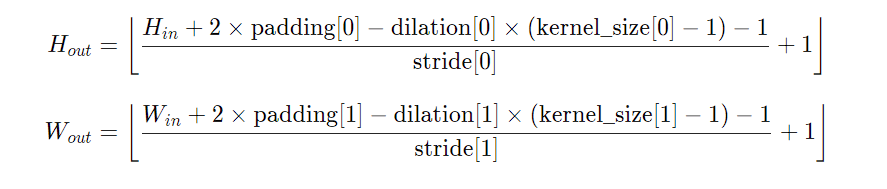

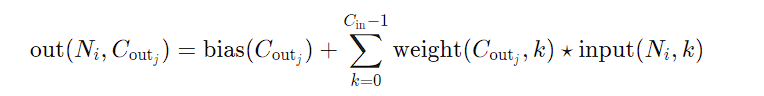

Реализуем функцию

In [38]:
def conv2D(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1):
    
    img_height, img_width = input.shape
    kernel_height, kernel_width = weight.shape

    # Определение размерности выхода
    h_out = int((img_height + 2 * padding -dilation * (kernel_height -1) -1)/stride + 1)
    w_out = int((img_width + 2 * padding -dilation * (kernel_width -1) -1)/stride + 1)

    result = np.zeros((h_out, w_out))

    # Проверка параметра padding
    if padding > 0:
        input = np.pad(input, padding, mode='constant')

    # Свёртка
    for y in range(h_out):
        for x in range(w_out):
            result[y, x] = np.sum(input[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width] * weight)
    return result

Проверим её

In [23]:
# Сначала сгенерируем случайное изображение и  матрицу
image = torch.randn(1, 1, 5, 5) 
kernel = torch.randn(1, 1, 3, 3) 

# print(image[0, 0].numpy())
test1_output1 = torch.from_numpy(conv2D(image[0, 0].numpy(), kernel[0, 0].numpy()))

# Помотрим, что выводят 2 функции
print("Результат моей функции conv2D:")
print(test1_output1)
print("Результат функции Conv2d из библиотеки PyTorch:")
test1_output2 = F.conv2d(image, kernel)
print(test1_output2)

# Теперь сравним их
test1_output1 = test1_output1.to(test1_output2.dtype)

torch.allclose(test1_output1, test1_output2)

Результат моей функции conv2D:
tensor([[ 0.5516, -3.6516,  2.9081],
        [ 3.4063,  0.4133,  1.1002],
        [ 1.9193,  0.1127,  0.7561]], dtype=torch.float64)
Результат функции Conv2d из библиотеки PyTorch:
tensor([[[[ 0.5516, -3.6516,  2.9081],
          [ 3.4063,  0.4133,  1.1002],
          [ 1.9193,  0.1127,  0.7561]]]])


True

Создадим тесты

In [30]:
def test_1():
    image = torch.randn(1, 1, 5, 5) 
    kernel = torch.randn(1, 1, 3, 3)
    
    myConv2D = torch.from_numpy(conv2D(image[0, 0].numpy(), kernel[0, 0].numpy()))

    torchConv2D = F.conv2d(image, kernel)

    myConv2D = myConv2D.to(torchConv2D.dtype)

    assert torch.allclose(myConv2D, torchConv2D)

def test_2():
    image = torch.randn(1, 1, 7, 7) 
    kernel = torch.randn(1, 1, 2, 2) 
    
    myConv2D = torch.from_numpy(conv2D(image[0, 0].numpy(), kernel[0, 0].numpy()))

    torchConv2D = F.conv2d(image, kernel)

    myConv2D = myConv2D.to(torchConv2D.dtype)

    assert torch.allclose(myConv2D, torchConv2D)

def test_3():
    image = torch.randn(1, 1, 8, 8) 
    kernel = torch.randn(1, 1, 3, 3) 
    
    myConv2D = torch.from_numpy(conv2D(image[0, 0].numpy(), kernel[0, 0].numpy(), stride = 2))

    torchConv2D = F.conv2d(image, kernel, stride = 2)

    myConv2D = myConv2D.to(torchConv2D.dtype)

    assert torch.allclose(myConv2D, torchConv2D)

def test_4():
    image = torch.randn(1, 1, 6, 6) 
    kernel = torch.randn(1, 1, 2, 2) 
    
    myConv2D = torch.from_numpy(conv2D(image[0, 0].numpy(), kernel[0, 0].numpy(), stride = 2))

    torchConv2D =F.conv2d(image, kernel,stride = 2)

    myConv2D = myConv2D.to(torchConv2D.dtype)

    assert torch.allclose(myConv2D, torchConv2D)

Успешный тест:

In [31]:
test_1()
test_2()
test_3()
test_4()

# Попробуем применить к изображению

In [32]:
from PIL import Image
import matplotlib.pyplot as plt

tensor([[[[0.8862, 0.8862, 0.8862,  ..., 0.8862, 0.8862, 0.8862],
          [0.8862, 0.8862, 0.8862,  ..., 0.8862, 0.8862, 0.8862],
          [0.8862, 0.8862, 0.8862,  ..., 0.8862, 0.8862, 0.8862],
          ...,
          [0.8862, 0.8862, 0.8862,  ..., 0.8823, 0.8823, 0.8823],
          [0.8862, 0.8862, 0.8862,  ..., 0.8823, 0.8823, 0.8823],
          [0.8862, 0.8862, 0.8862,  ..., 0.8823, 0.8823, 0.8823]]]])


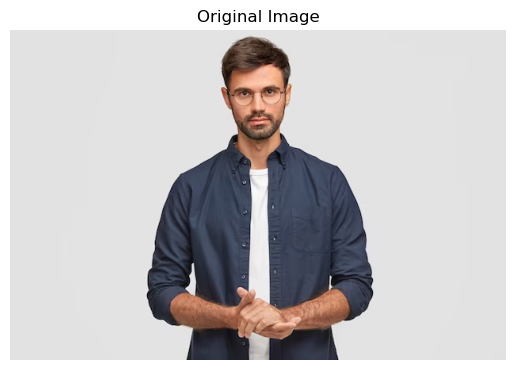

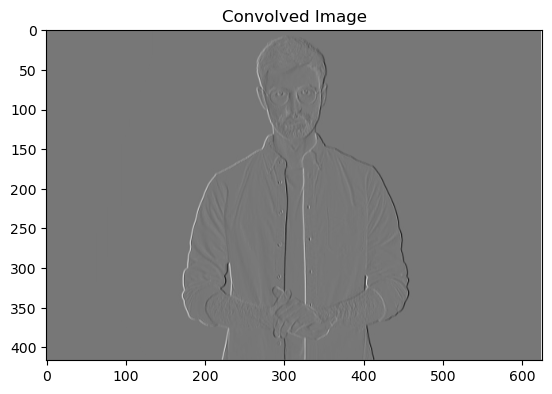

In [39]:
img = Image.open('man.jpg')

# Преобразование изображение в массив чисел
img_array = np.array(img)
img_gray = np.dot(img_array[..., :3], [0.2989, 0.5870, 0.1140])  # Преобразование в оттенки серого

# Преобразуем число в тензор
img_tensor = torch.tensor(img_gray, dtype=torch.float32)
img_tensor = img_tensor.unsqueeze(0).unsqueeze(0) / 255.0  #  нормализация

# Определение ядра свертки
filter_weights = torch.tensor([[0.0, 1.0, -1.0],
                               [0.0, 1.0, -1.0],
                               [0.0, 1.0, -1.0]])
filter_weights = filter_weights.unsqueeze(0).unsqueeze(0)

print(img_tensor)

plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

put = conv2D(img_tensor[0, 0].numpy(), filter_weights[0, 0].numpy(), stride=1, padding=1)
output_image = put.squeeze()
plt.imshow(output_image, cmap='gray')
plt.title('Convolved Image')
plt.show()